# Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/Users/karmenmarkov/Library/CloudStorage/GoogleDrive-kkarmenmarkov@gmail.com/My Drive/masters_ppg/final_df_3_stages_stand.csv")


In [3]:
# Check for infinite values
# Identify numeric columns in the DataFrame
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Detect and report if there are any infinite values in the numeric columns of the DataFrame
if np.isinf(df[numeric_cols].values).any():
    print('The DataFrame contains infinite values in numeric columns')

# Get the numeric columns with infinite values
inf_columns = numeric_cols.to_series()[np.isinf(df[numeric_cols]).any()]
print('Numeric columns with infinite values:', inf_columns)

# Replace infinite values with NaNs in the numeric columns of the original DataFrame
df[inf_columns] = df[inf_columns].replace([np.inf, -np.inf], np.nan)


Numeric columns with infinite values: Series([], dtype: object)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['3_stages'])  # Extract features excluding the label column 'PPG_GM','PPI_GM'

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

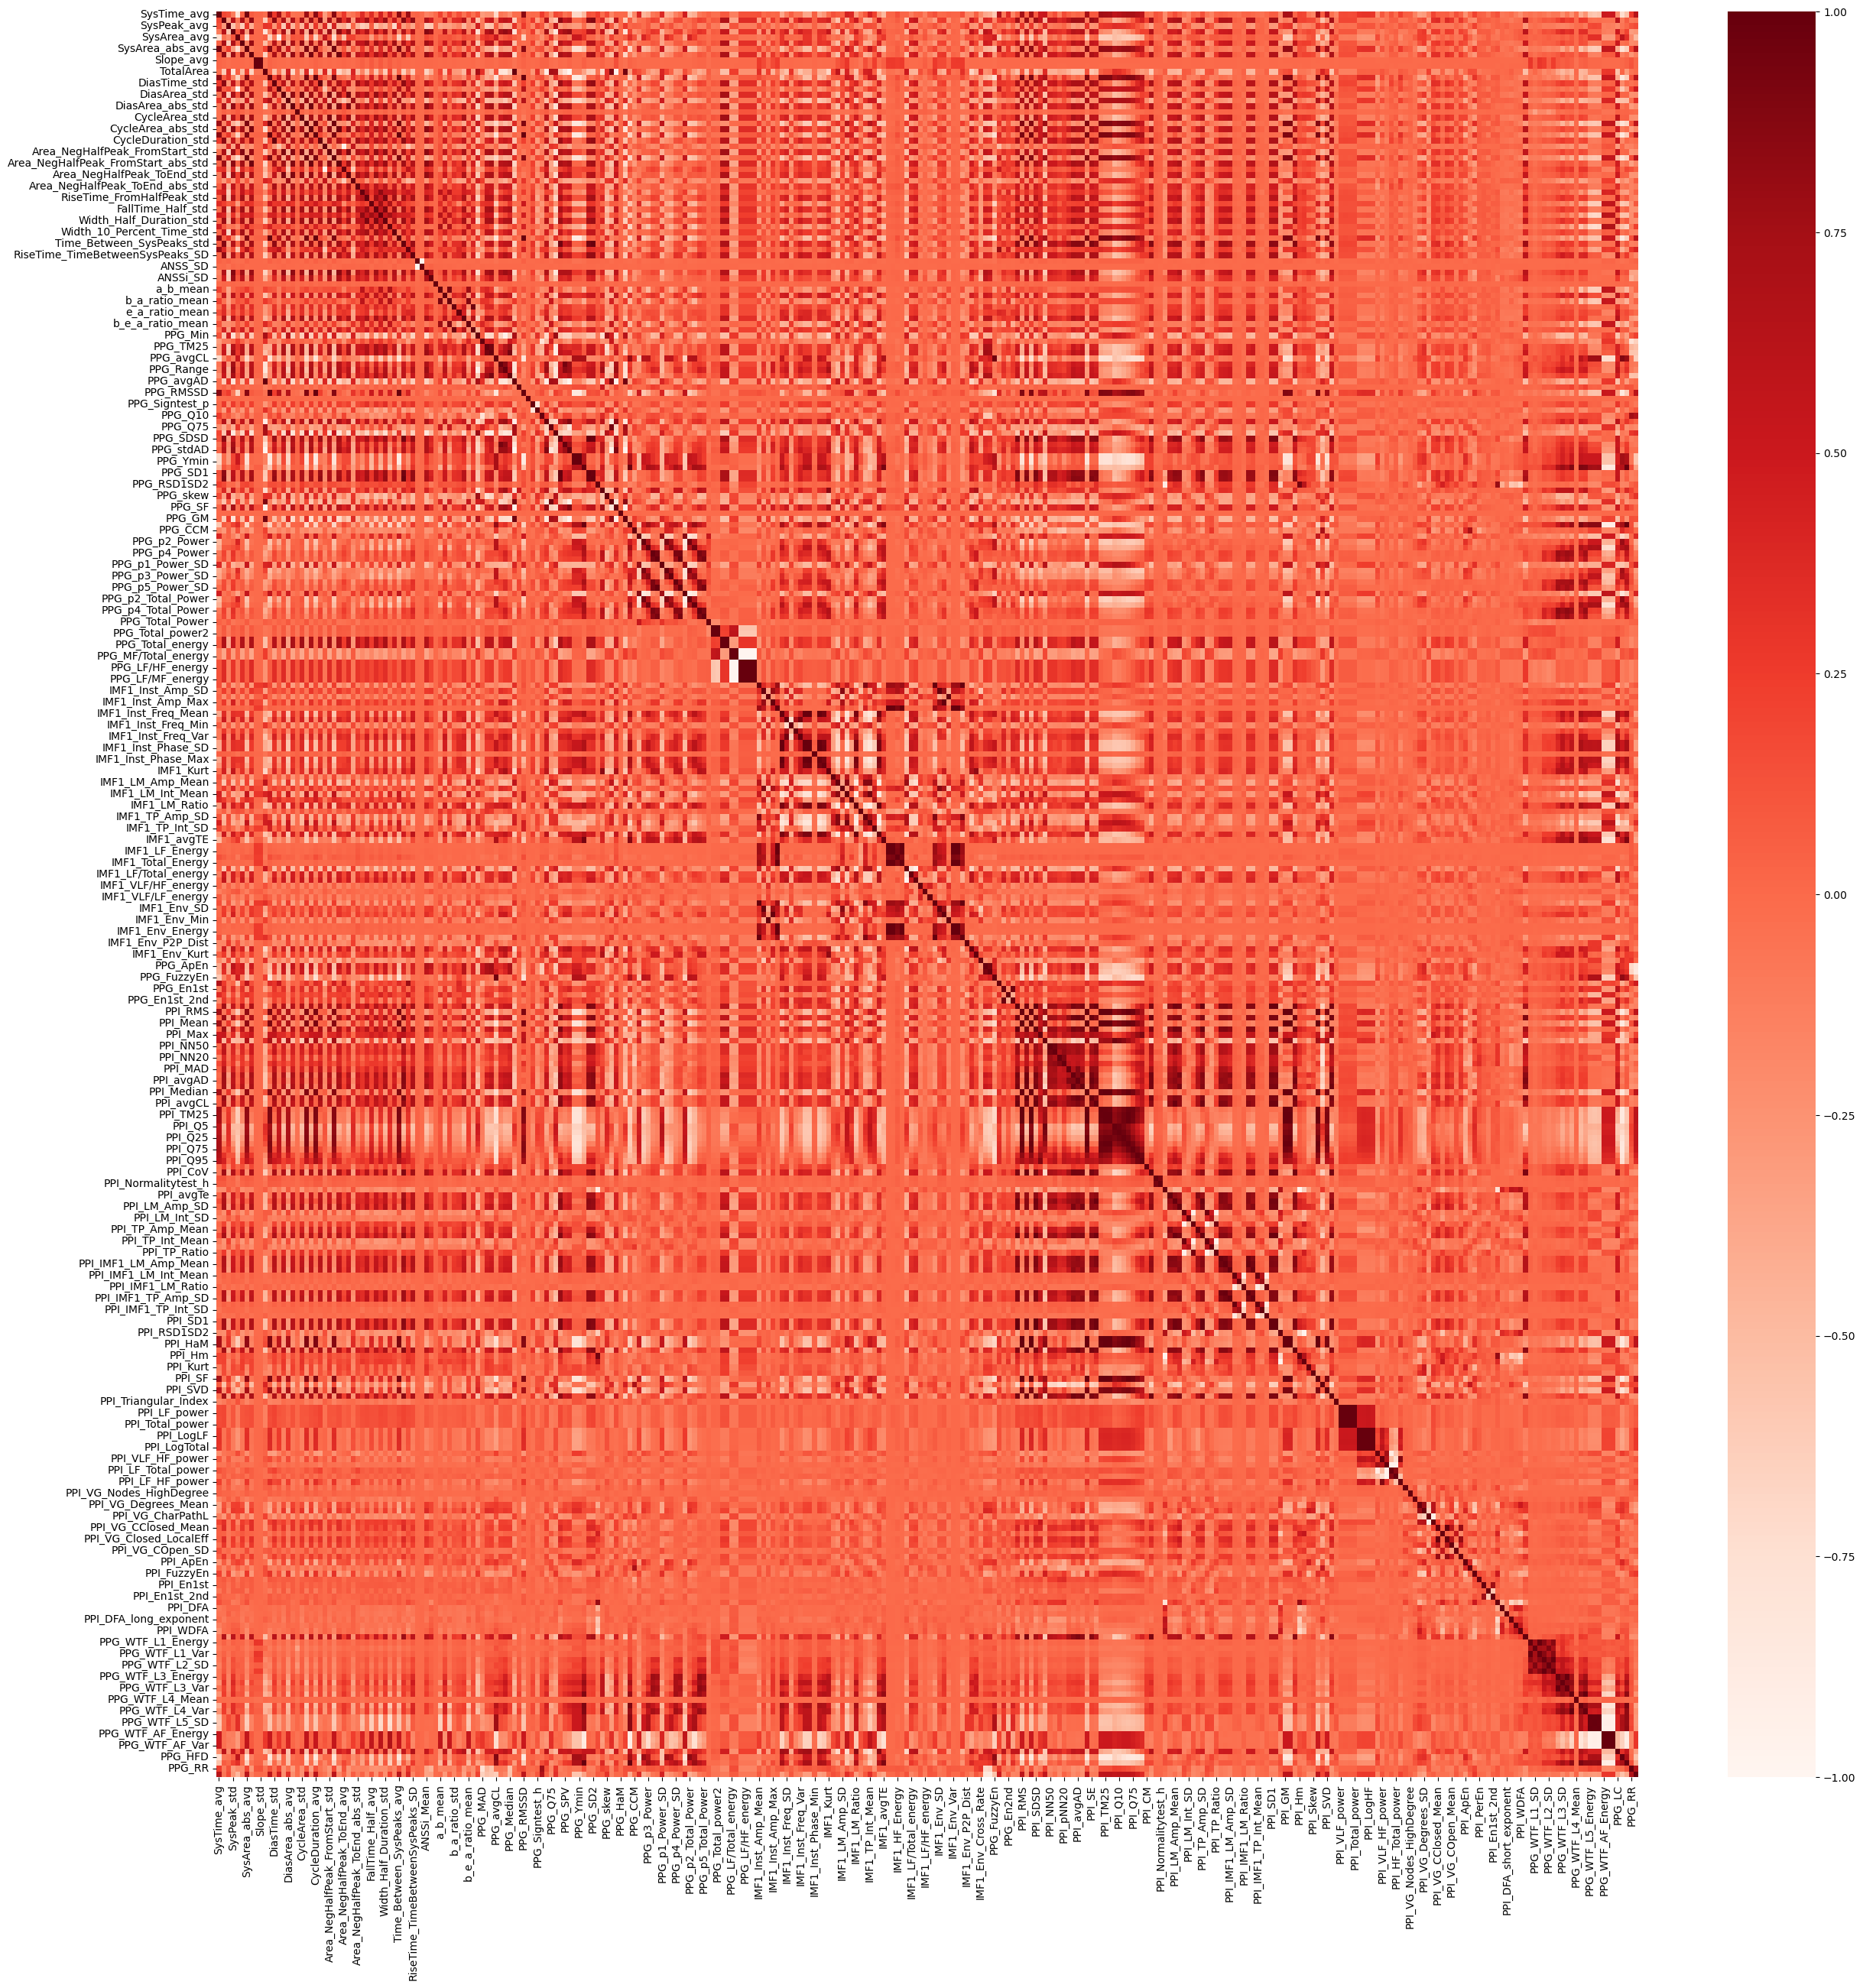

In [5]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [6]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [7]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [8]:
# Check NaNs

#df_revised = df
nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_S

In [9]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


# Prepare X and y

In [10]:
# Load subjects
df_subjects = pd.read_csv("/Users/karmenmarkov/Library/CloudStorage/GoogleDrive-kkarmenmarkov@gmail.com/My Drive/masters_ppg/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['3_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['3_stages']
groups = df_revised['SubjectID']



# SMOTE Balancing

In [11]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]
        
        # Impute missing values
        X_g = imputer.fit_transform(X_g)
        
        smote = SMOTE(random_state=42)
        X_resampled_g, y_resampled_g = smote.fit_resample(X_g, y_g)
        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))  # Convert back to DataFrame to maintain feature names
        resampled_y.append(pd.Series(y_resampled_g))  # Convert back to Series
        resampled_groups.extend([group] * len(y_resampled_g))  # Extend the groups array with the current group repeated for the resampled size

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)

# Usage of the function with sample data
# Assume X, y, and groups are already defined and appropriately prepared
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)



In [12]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

3_stages
0    55875
1    55875
2    55875
Name: count, dtype: int64


# Feature Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysPeak_avg', 'SysPeak_std', 'SysArea_avg',
       'DiasArea_avg', 'DiasArea_abs_avg', 'CycleArea_std',
       'Area_NegHalfPeak_FromStart_avg', 'Area_NegHalfPeak_ToEnd_avg',
       'Area_NegHalfPeak_ToEnd_abs_avg', 'Area_NegHalfPeak_ToEnd_abs_std',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_std',
       'Width_10_Percent_Time_avg', 'Width_10_Percent_Time_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'RiseTime_TimeBetweenSysPeaks_SD',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPG_Min',
       'PPG_MAD', 'PPG_TM25', 'PPG_TM50', 'PPG_Median', 'PPG_Q10', 'PPG_Q25',
       'PPG_Q75', 'PPG_Q90', 'PPG_skew', 'PPG_IQR', 'PPG_p4_Power',
       'PPG_p4_Power_SD', 'PPG_p2_Total_Power', 'PPG_p4_Total_Power',
       'IMF1_Inst_Freq_Mean', 'IMF1_TP_Int_SD', 'PPG_ApEn', 'PPG_Samp

In [15]:
X_selected = X_resampled[selected_features]
X_selected

,SysTime_avg,SysPeak_avg,SysPeak_std,SysArea_avg,DiasArea_avg,DiasArea_abs_avg,CycleArea_std,Area_NegHalfPeak_FromStart_avg,Area_NegHalfPeak_ToEnd_avg,Area_NegHalfPeak_ToEnd_abs_avg,...,PPI_LF_HF_power,PPI_PerEn,PPI_En1st,PPI_En2nd,PPI_HFD,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_LC,PPG_DET
0,0.243075,2.051287,1.271953,-1.285312,1.261417,0.259398,14.887894,17.410490,-15.377866,0.122107,...,16395.156077,0.985228,0.978870,1.000000,1.840314,1.041127,73.786172,0.544357,56.679685,0.916861
1,0.343277,1.927268,1.754324,2.661957,-2.347344,0.350208,33.482002,23.818025,-20.749097,0.224424,...,16209.717965,0.992267,0.996317,0.975119,1.670130,1.191702,124.451367,0.706797,59.669821,0.961463
2,0.274200,2.242864,1.318513,0.956881,-0.729983,0.321099,39.961905,20.078857,-20.758618,0.163108,...,16388.995483,0.999526,0.998001,0.999473,1.935544,0.566286,47.301892,0.435842,61.623213,0.889709
3,0.437240,2.824896,1.867212,-1.905432,2.499454,0.399883,33.056040,22.102188,-21.490199,0.175081,...,18355.539623,0.994030,0.998364,0.970951,1.842306,0.691065,357.419869,1.197743,62.408353,0.864056
4,0.274282,2.913433,0.555042,1.484555,-1.118548,0.390905,21.932653,25.067343,-23.335804,0.199192,...,16392.912340,0.959687,0.918296,0.988699,1.902181,1.272573,51.561563,0.455048,56.876811,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167620,0.424667,2.827618,0.692377,2.902055,-1.999603,0.454537,13.777609,29.309622,-26.902867,0.249889,...,17692.405546,0.986746,0.989795,0.962894,2.031627,0.845284,15.215948,0.245013,50.339559,0.937407
167621,0.371237,2.889330,0.556124,1.789559,-1.457584,0.512609,16.537379,31.035646,-29.331855,0.281098,...,16876.713697,0.997490,0.998741,1.000000,1.990526,0.686186,31.919652,0.357988,54.706959,0.937638
167622,0.383411,2.823317,0.694891,1.833803,-1.737019,0.502359,17.402202,30.195387,-28.819887,0.264468,...,16643.883441,0.991619,0.997154,0.997079,2.066919,0.660761,29.323510,0.340280,54.055745,0.925048
167623,0.323889,2.806529,0.641456,3.485356,-3.579545,0.478401,13.665608,30.041671,-28.693363,0.277749,...,18120.585069,0.976270,0.995935,0.990027,2.048062,0.609137,32.537337,0.361148,54.595495,0.918737


# Hyperparameter tuning

In [16]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.301 total time= 2.0min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.332 total time= 2.0min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.344 total time= 2.0min
[CV 2/3] END classifier__bootstrap=False, classifier__max_depth=12, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=199;, score=0.301 total time= 2.5min
[CV 1/3] END classifier__bootstrap=F

/Users/karmenmarkov/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=491;, score=0.333 total time= 4.3min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=None, classifier__min_samples_leaf=5, classifier__min_samples_split=8, classifier__n_estimators=140;, score=0.221 total time= 4.0min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=None, classifier__min_samples_leaf=5, classifier__min_samples_split=8, classifier__n_estimators=140;, score=0.207 total time= 4.0min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=None, classifier__min_samples_leaf=5, classifier__min_samples_split=8, classifier__n_estimators=140;, score=0.280 total time= 4.0min
[CV 1/3] END classifier__bootstrap=False, classifier__max_depth=13, classifier__max_features=None, cl